# Exercise 3

## Network definition

To solve this exercise we must consider an additional node $d'$.


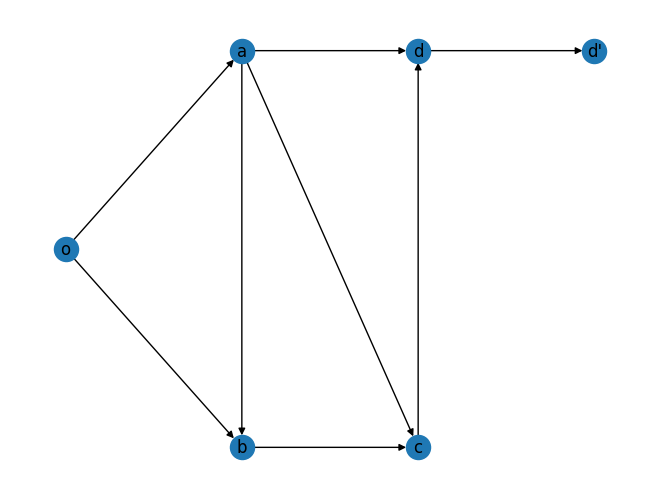

In [133]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_nodes_from(['o', 'a', 'b', 'c', 'd', 'd\''])
G.add_edges_from([('o', 'a'), ('o', 'b'), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('a', 'd'), ('c', 'd'), ('d', 'd\'')])

pos = ({'o': (0,1), 'a':(1,2), 'b':(1,0), 'c':(2,0), 'd':(2,2), 'd\'':(3,2)})

nx.draw(G, pos, with_labels=True)
plt.show()



## Proportional rate

Let us consider the given matrix:

$$
\Lambda =
\begin{bmatrix}
0 & 1 & 1 & 0 & 0\\
0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{2}{4} \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
$$

In order to include the local rate $w_d$, we considered a matrix $\Lambda$ that includes $d'$.

$$
\Lambda_2 =
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{4} & \frac{1}{4} & \frac{2}{4} & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{7}{4} \\
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$



In [83]:

Lambda = [[0, 1, 1, 0, 0],
    [0, 0, 1/4, 1/4, 2/4],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]]

Lambda2 = [[0, 1, 1, 0, 0, 0],
          [0, 0, 1/4, 1/4, 2/4, 0],
          [0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 7/4],
          [0, 0, 0, 0, 0, 1]]


w = np.sum(Lambda2, axis=1)

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda2

print(P)



[[0.   0.5  0.5  0.   0.   0.  ]
 [0.   0.   0.25 0.25 0.5  0.  ]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.  ]]


In order to solve the exercise, under the proportional rate assumption, we need to consider the probability distribution of the minumin of exponential random variables.

Let us consider $S_1, ..., S_n$ independent exponentially distributed random variables with rates $\lambda_1, ..., \lambda_n$, then

$$
\min \{ S_1,...,S_n  \}
$$

is also exponentially distributed, with rate $\lambda_1 +...+ \lambda_n$.

Moreover,

$$
\mathbb{P}(S_k = \min \{S_1, ..., S_n\}) = \frac{\lambda_k}{\lambda_1 + ... + \lambda_n}
$$

More in details, in the exercise we have to consider six different exponential distribution:

*   $S_0 \sim (t, \lambda)$, where $\lambda$ is the input rate
*   $S_1 \sim (t, N_o(t)w_o)$
*   $S_2 \sim (t, N_a(t)w_a)$
*   $S_3 \sim (t, N_b(t)w_b)$
*   $S_4 \sim (t, N_c(t)w_c)$
*   $S_5 \sim (t, N_d(t)w_d)$

The random variable that determine the next event is $\min \{ S_0, S_1, S_2, S_3, S_4, S_5 \}$, which is exponentially distributed with total rate total equal to

$$
\lambda_{tot} = \lambda + N_o(t)w_o + N_a(t)w_a + N_b(t)w_b + N_c(t)w_c + N_d(t)w_d
$$

The probability that the next event correspond to clock $S_k$ is

$$
\mathbb{P}(S_k = \min \{S_1, ..., S_n\}) = \frac{rate_k}{\lambda_{tot}}
$$

Eventually, at each tick (sampled from an exponential distribution with rate $\lambda_{tot}$), we randomly select whether the next event is a new input or a particle moving from a node, according to the probability described above.




In [84]:

N = np.zeros((6, ))

max_time = 60
input_rate = 100
#input_rate = 4000

input_time = []
input_time.append(0)
total_particles = 0
states = []
states.append(N.copy())

while input_time[-1] < max_time:
  rate = input_rate + N @ w.T
  t_next = -np.log(np.random.rand())/rate
  input_time.append(input_time[-1] + t_next)

  probabilities = np.array([input_rate, N[0]*w[0], N[1]*w[1], N[2]*w[2], N[3]*w[3], N[4]*w[4], N[5]*w[5]])
  probabilities = probabilities/np.sum(probabilities)

  choice = np.random.choice(7, p=probabilities)
  if choice == 0:
    N[0] += 1
    states.append(N.copy())
    total_particles += 1
    print(f"new particles: number of particles = {total_particles}")
  else:
    N[choice-1] -=1
    # now the particle moves according to P
    move = np.random.choice(6, p=P[choice-1])
    if move != 5:
      N[move] += 1
    states.append(N.copy())
    print(f"move: from {choice-1} to {move}" )

  print(input_time[-1])
  print(N)

N_matrix = np.array(states).T   # <-- rows: nodes; columns:steps
print(N_matrix)



Output streaming troncato alle ultime 5000 righe.
56.49391360210691
[39. 59. 51. 90. 58.  0.]
move: from 0 to 1
56.49443183741734
[38. 60. 51. 90. 58.  0.]
move: from 4 to 5
56.49970707711541
[38. 60. 51. 90. 57.  0.]
move: from 4 to 5
56.501357123219854
[38. 60. 51. 90. 56.  0.]
move: from 2 to 3
56.505269817863606
[38. 60. 50. 91. 56.  0.]
move: from 3 to 4
56.50680017402443
[38. 60. 50. 90. 57.  0.]
move: from 1 to 4
56.507421514271535
[38. 59. 50. 90. 58.  0.]
move: from 0 to 2
56.50822341227429
[37. 59. 51. 90. 58.  0.]
new particles: number of particles = 5730
56.514580495636814
[38. 59. 51. 90. 58.  0.]
move: from 3 to 4
56.51482148959184
[38. 59. 51. 89. 59.  0.]
move: from 0 to 2
56.51593408049734
[37. 59. 52. 89. 59.  0.]
move: from 3 to 4
56.51774274365763
[37. 59. 52. 88. 60.  0.]
move: from 1 to 3
56.51954449310453
[37. 58. 52. 89. 60.  0.]
move: from 4 to 5
56.52087552162115
[37. 58. 52. 89. 59.  0.]
move: from 0 to 2
56.521371402713946
[36. 58. 53. 89. 59.  0.]
move: fro

### Plot

We can observe that the system cannot blow up due to the proportional rate associated with each node. If a particular node has many particles, its rate will increase and then it will have an higher priority on sending them.

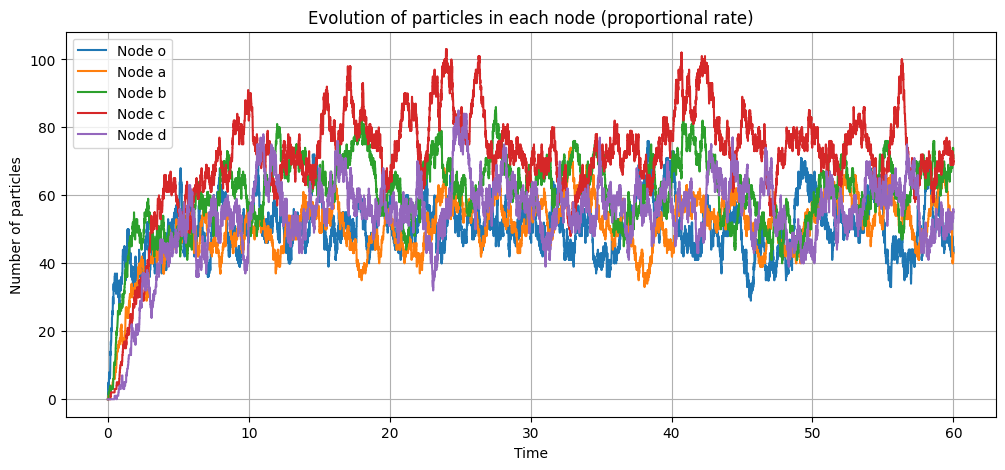

In [85]:


nodes = ['o', 'a', 'b', 'c', 'd']

plt.figure(figsize=(12, 5))

for i in range(5):
    plt.plot(input_time, N_matrix[i], label=f"Node {nodes[i]}")

plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Evolution of particles in each node (proportional rate)")
plt.legend()
plt.grid(True)
plt.show()




## Fixed rate

The problem can be solved as before, but considering:
*   $S_0 \sim (t, \lambda)$, where $\lambda$ is the input rate
*   $S_1 \sim (t, w_o)$
*   $S_2 \sim (t, w_a)$
*   $S_3 \sim (t, w_b)$
*   $S_4 \sim (t, w_c)$
*   $S_5 \sim (t, w_d)$

In [136]:
N = np.zeros((6, ))

max_time = 9000
#input_rate = 2
input_rate = 1.32 #maximum input_rate

input_time = []
input_time.append(0)
total_particles = 0
states = []
states.append(N.copy())

rate = input_rate + w[0] + w[1] + w[2] + w[3] + w[4]


probabilities = np.array([input_rate, w[0], w[1], w[2], w[3], w[4]])
probabilities = probabilities/np.sum(probabilities)

while input_time[-1] < max_time:
  t_next = -np.log(np.random.rand())/rate
  input_time.append(input_time[-1] + t_next)

  choice = np.random.choice(6, p=probabilities)
  if choice == 0:
    N[0] += 1
    total_particles += 1
    print(f"new particles: number of particles = {total_particles}")
  else:
    if N[choice-1] > 0:
      N[choice-1] -=1
      # now the particle moves according to P
      move = np.random.choice(6, p=P[choice-1])
      if move != 5:
        N[move] += 1
      print(f"move: from {choice-1} to {move}" )

  states.append(N.copy())
  print(input_time[-1])
  print(N)

N_matrix = np.array(states).T   # <-- rows: nodes; columns:steps
print(N_matrix)

print(rate)
print(probabilities)

Output streaming troncato alle ultime 5000 righe.
[  0.   3.  17. 216.   0.   0.]
move: from 3 to 4
8776.253722540134
[  0.   3.  17. 215.   1.   0.]
move: from 3 to 4
8776.361944732464
[  0.   3.  17. 214.   2.   0.]
move: from 4 to 5
8776.660969790237
[  0.   3.  17. 214.   1.   0.]
new particles: number of particles = 12036
8776.706321250438
[  1.   3.  17. 214.   1.   0.]
new particles: number of particles = 12037
8776.732046835352
[  2.   3.  17. 214.   1.   0.]
move: from 0 to 1
8777.029820663576
[  1.   4.  17. 214.   1.   0.]
move: from 0 to 2
8777.147921383861
[  0.   4.  18. 214.   1.   0.]
move: from 4 to 5
8777.188922385763
[  0.   4.  18. 214.   0.   0.]
new particles: number of particles = 12038
8777.229389525843
[  1.   4.  18. 214.   0.   0.]
move: from 0 to 1
8777.549657621503
[  0.   5.  18. 214.   0.   0.]
new particles: number of particles = 12039
8777.660521864716
[  1.   5.  18. 214.   0.   0.]
move: from 1 to 3
8777.704015419937
[  1.   4.  18. 215.   0.   0.]
mo

### Plot

According to the experiments, the system blows up if we consider $\lambda > 1.32$. The reason why the system can blow up when using a $\lambda$ larger than the threshold is that we are considering a fixed rate for each node. If input rate exceeds the threshold described above, some node (specifically, the node C) will send particles more slowly than they receive them. As a result, the total number of particles stored at node C will diverge.

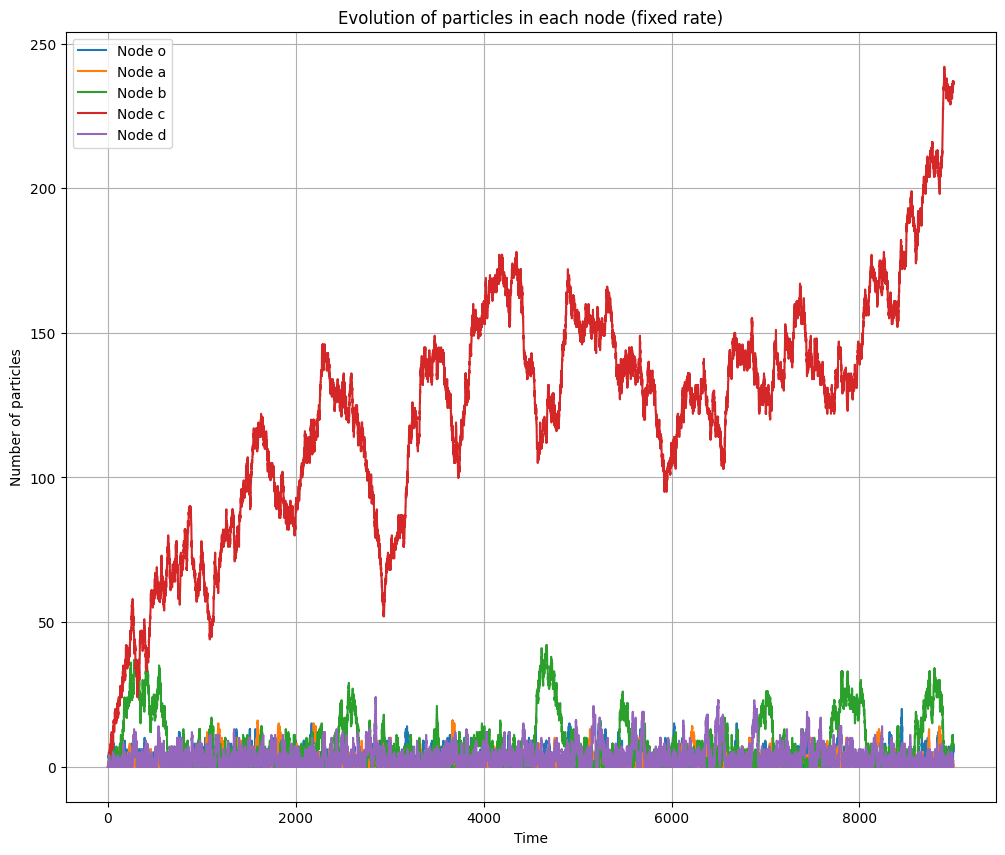

In [137]:
nodes = ['o', 'a', 'b', 'c', 'd']

plt.figure(figsize=(12, 10))

for i in range(5):
    plt.plot(input_time, N_matrix[i], label=f"Node {nodes[i]}")

plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Evolution of particles in each node (fixed rate)")
plt.legend()
plt.grid(True)
plt.show()